In [1]:
import sys
sys.path.append('./src') 
from preprocessing import ImagePreprocessor
from detector import FaceDetector
from PIL import Image
import matplotlib.pyplot as plt

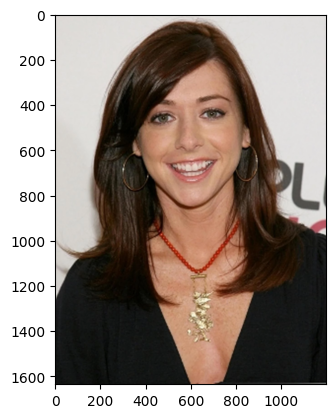

In [2]:
# set image path
image_path =  "/workspaces/face_duplicate_detection/data/images/Alyson Hannigan_70596.jpg"
img = Image.open(image_path)

plt.imshow(img)

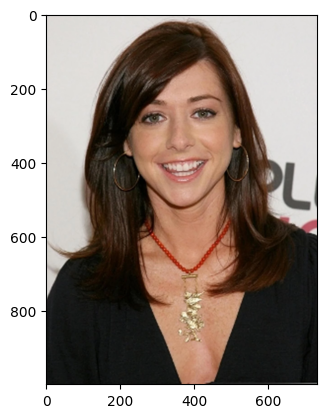

In [3]:
# show preprocess image
processor = ImagePreprocessor(max_size = 1000)
img_proc = processor.preprocess(image_path)

plt.imshow(img_proc)

### Test embdding on 2 image

In [4]:
from embedding import FaceNetEmbedding

In [22]:
# set 2 similiar image 
image1 = "/workspaces/face_duplicate_detection/data/images/Wendie Malick_103158.jpg"
image2 = "/workspaces/face_duplicate_detection/data/images/Wendie Malick_103159.jpg"

In [23]:
# preprocess both
pre_img1 = processor.preprocess(image1)
pre_img2 = processor.preprocess(image2)

# detect faces on both
detector = FaceDetector(detector_type="mtcnn")
face1 = detector.detect_and_align(pre_img1)
face2 = detector.detect_and_align(pre_img2)

INFO:detector:Initializing MTCNN detector


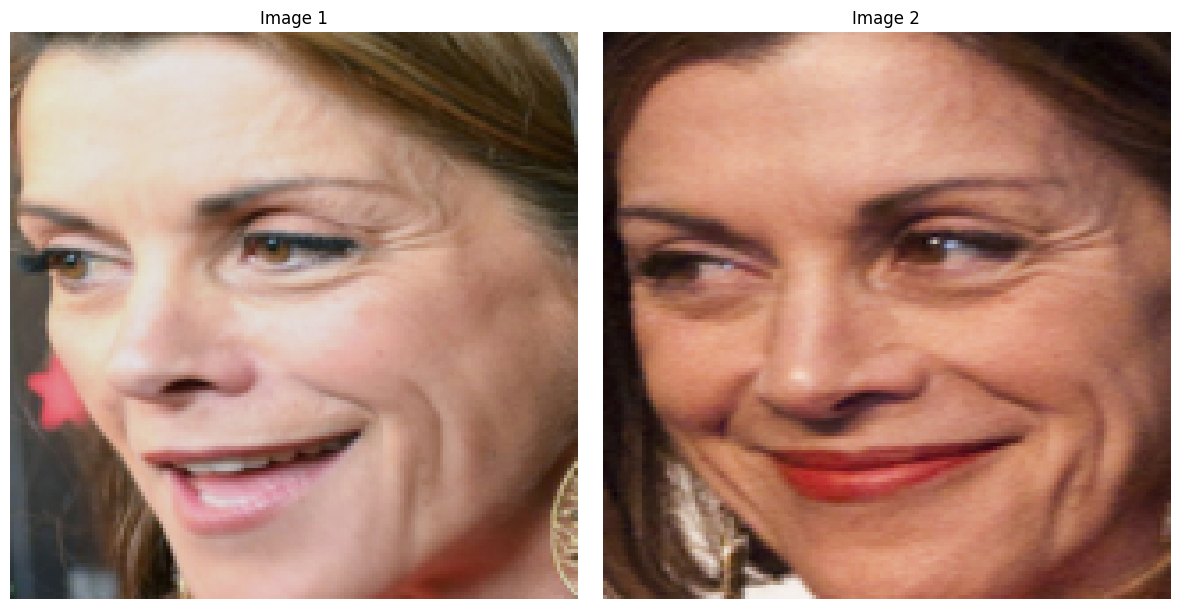

In [24]:
# Show side-by-side
face_img1 = face1.permute(1, 2, 0).numpy()
face_img1 = (face_img1 * 0.5) + 0.5

face_img2 = face2.permute(1, 2, 0).numpy()
face_img2 = (face_img2 * 0.5) + 0.5

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(face_img1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(face_img2)
axes[1].set_title('Image 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [25]:
# run face embedding model
embedding = FaceNetEmbedding()
emb1 = embedding.extract(face1)
emb2 = embedding.extract(face2)

In [26]:
# test with cosine similiarity
import numpy as np
def cosine_similarity(embedding1, embedding2):
    """
    Calculate cosine similarity between two embeddings
    
    Returns:
        float: Similarity score (0 to 1, higher = more similar)
    """
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    return dot_product / (norm1 * norm2)

In [27]:
score = cosine_similarity(emb1, emb2)
print(f"Similiarity score: {score}")

Similiarity score: 0.8638413548469543


In [ ]:
# but the model failed when comparing faces from different age, e.g young and old arnold

INFO:detector:Initializing MTCNN detector


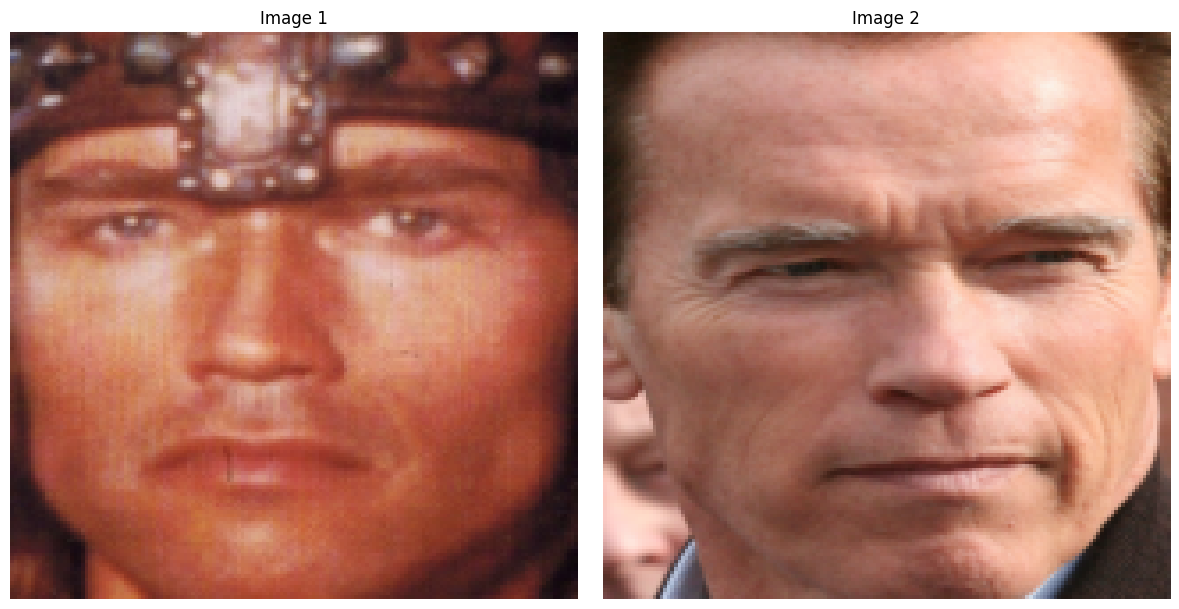

In [28]:
image1 = "/workspaces/face_duplicate_detection/data/images/Arnold Schwarzenegger_7050.jpeg"
image2 = "/workspaces/face_duplicate_detection/data/images/Arnold Schwarzenegger_7054.jpg"
pre_img1 = processor.preprocess(image1)
pre_img2 = processor.preprocess(image2)
detector = FaceDetector(detector_type="mtcnn")
face1 = detector.detect_and_align(pre_img1)
face2 = detector.detect_and_align(pre_img2)

# Show side-by-side
face_img1 = face1.permute(1, 2, 0).numpy()
face_img1 = (face_img1 * 0.5) + 0.5

face_img2 = face2.permute(1, 2, 0).numpy()
face_img2 = (face_img2 * 0.5) + 0.5

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(face_img1)
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(face_img2)
axes[1].set_title('Image 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [29]:
emb1 = embedding.extract(face1)
emb2 = embedding.extract(face2)
score = cosine_similarity(emb1, emb2)
print(f"Similiarity score: {score}")

Similiarity score: 0.4514089524745941
